In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from astropy.coordinates import Angle, SkyCoord
from astropy import units as un
from matplotlib.legend_handler import HandlerTuple

## V1674HERB

In [3]:
date = 20
freq = 4.68e9

conv = (3600)**(-1)*(np.pi/180) #arcsec to rad
conv_deg = (3600)**(-1)
jy = 10e-26

theta1 = 3.417e-02 *conv
theta2 = 1.515e-02 *conv
# theta1 = 1.074e-02 *conv #from the manual data
# theta2 = 9.535e-03*conv

flux =  1.6953e-03



k = 1.38e-23
c = 2.99e8
### frtom JMFIT NITER = 40
# theta1 =0.0173347*conv;
# theta2 = 0.0105904*conv;
# flux = 4.1757E-03;

In [4]:
Tb = (c/freq)**2 * (flux*jy) * (2*k)**(-1) * ((4*np.log10(2))/(np.pi*theta1*theta2))

In [5]:
f'{Tb:.2E}'


'7.90E+05'

## V1674HERD

In [6]:
date = 24
theta2d = 1.515e-02 *conv
theta1d = 3.417e-02 *conv
theta2d = 1.329e-02*conv
theta1d = 5.35e-03 *conv
fluxd = 9.7097e-04
##### from JMFIT NITER=40
theta1d=0.0165906*conv;
theta2d=0.0080879*conv;
fluxd=2.1017E-03;

Tbd = (c/freq)**2 * (fluxd*jy) * (2*k)**(-1) * ((4*np.log10(2))/(np.pi*theta1d*theta2d))

f'{Tbd:.2E}'
# f'{theta2d:.2E}'

'3.78E+06'

### Light Curve

In [8]:
lc_df = pd.read_csv('./tables/V1674HERLC.csv',delimiter=',');

VLBA = pd.DataFrame([[19.809700000099838, (flux*1e3)],[24,fluxd*1e3]],
                    columns = ['Day',  'Flux']);

bands = pd.DataFrame([['c', 5.1],['x', 7.0],['ku', 13.7],['k', 16.5],['ka', 31.1],['q', 34.9]],
                     columns=['name','freq']);
# lc_c = lc_df.loc[lc_df['Freq'] == 5.1]
# lc_x = lc_df.loc[lc_df['Freq'] == 7.0]
# lc_ku = lc_df.loc[lc_df['Freq'] == 13.7]
# lc_k = lc_df.loc[lc_df['Freq'] == 16.5]
# lc_ka = lc_df.loc[lc_df['Freq'] == 31.1]
# lc_q = lc_df.loc[lc_df['Freq'] == 34.9]

for i in range(0, len(bands)):
    
    name_i = bands.iloc[i,0];
    freq_i = bands.iloc[i,1];
    
    var_name = 'lc_' + str(name_i);
    globals()[var_name] = lc_df.loc[lc_df['Freq'] == freq_i];
    
    
    var_i = eval(var_name); 
    #create non-detection dataframes
    var_name2 = (var_name + '_nd');
    globals()[var_name2] = var_i.loc[var_i['Unnamed: 4'] == 'non-detection'];
    
    #create detection dataframes
    var_name3 = (var_name + '_d');
    globals()[var_name3] = (var_i.loc[var_i['Unnamed: 4'] != 'non-detection']);
    
    
    
#now have three dataframes:
    #lc_(band)_nd: which is all the ones which were indicated to be nondetections
    #lc_(band)_d: which are the ones which were indicated to be anything other than nondetections
    #lc_(band) which is a combination of the other two

In [9]:
VLBA

,Day,Flux
0,20,1.6953
1,24,2.1017


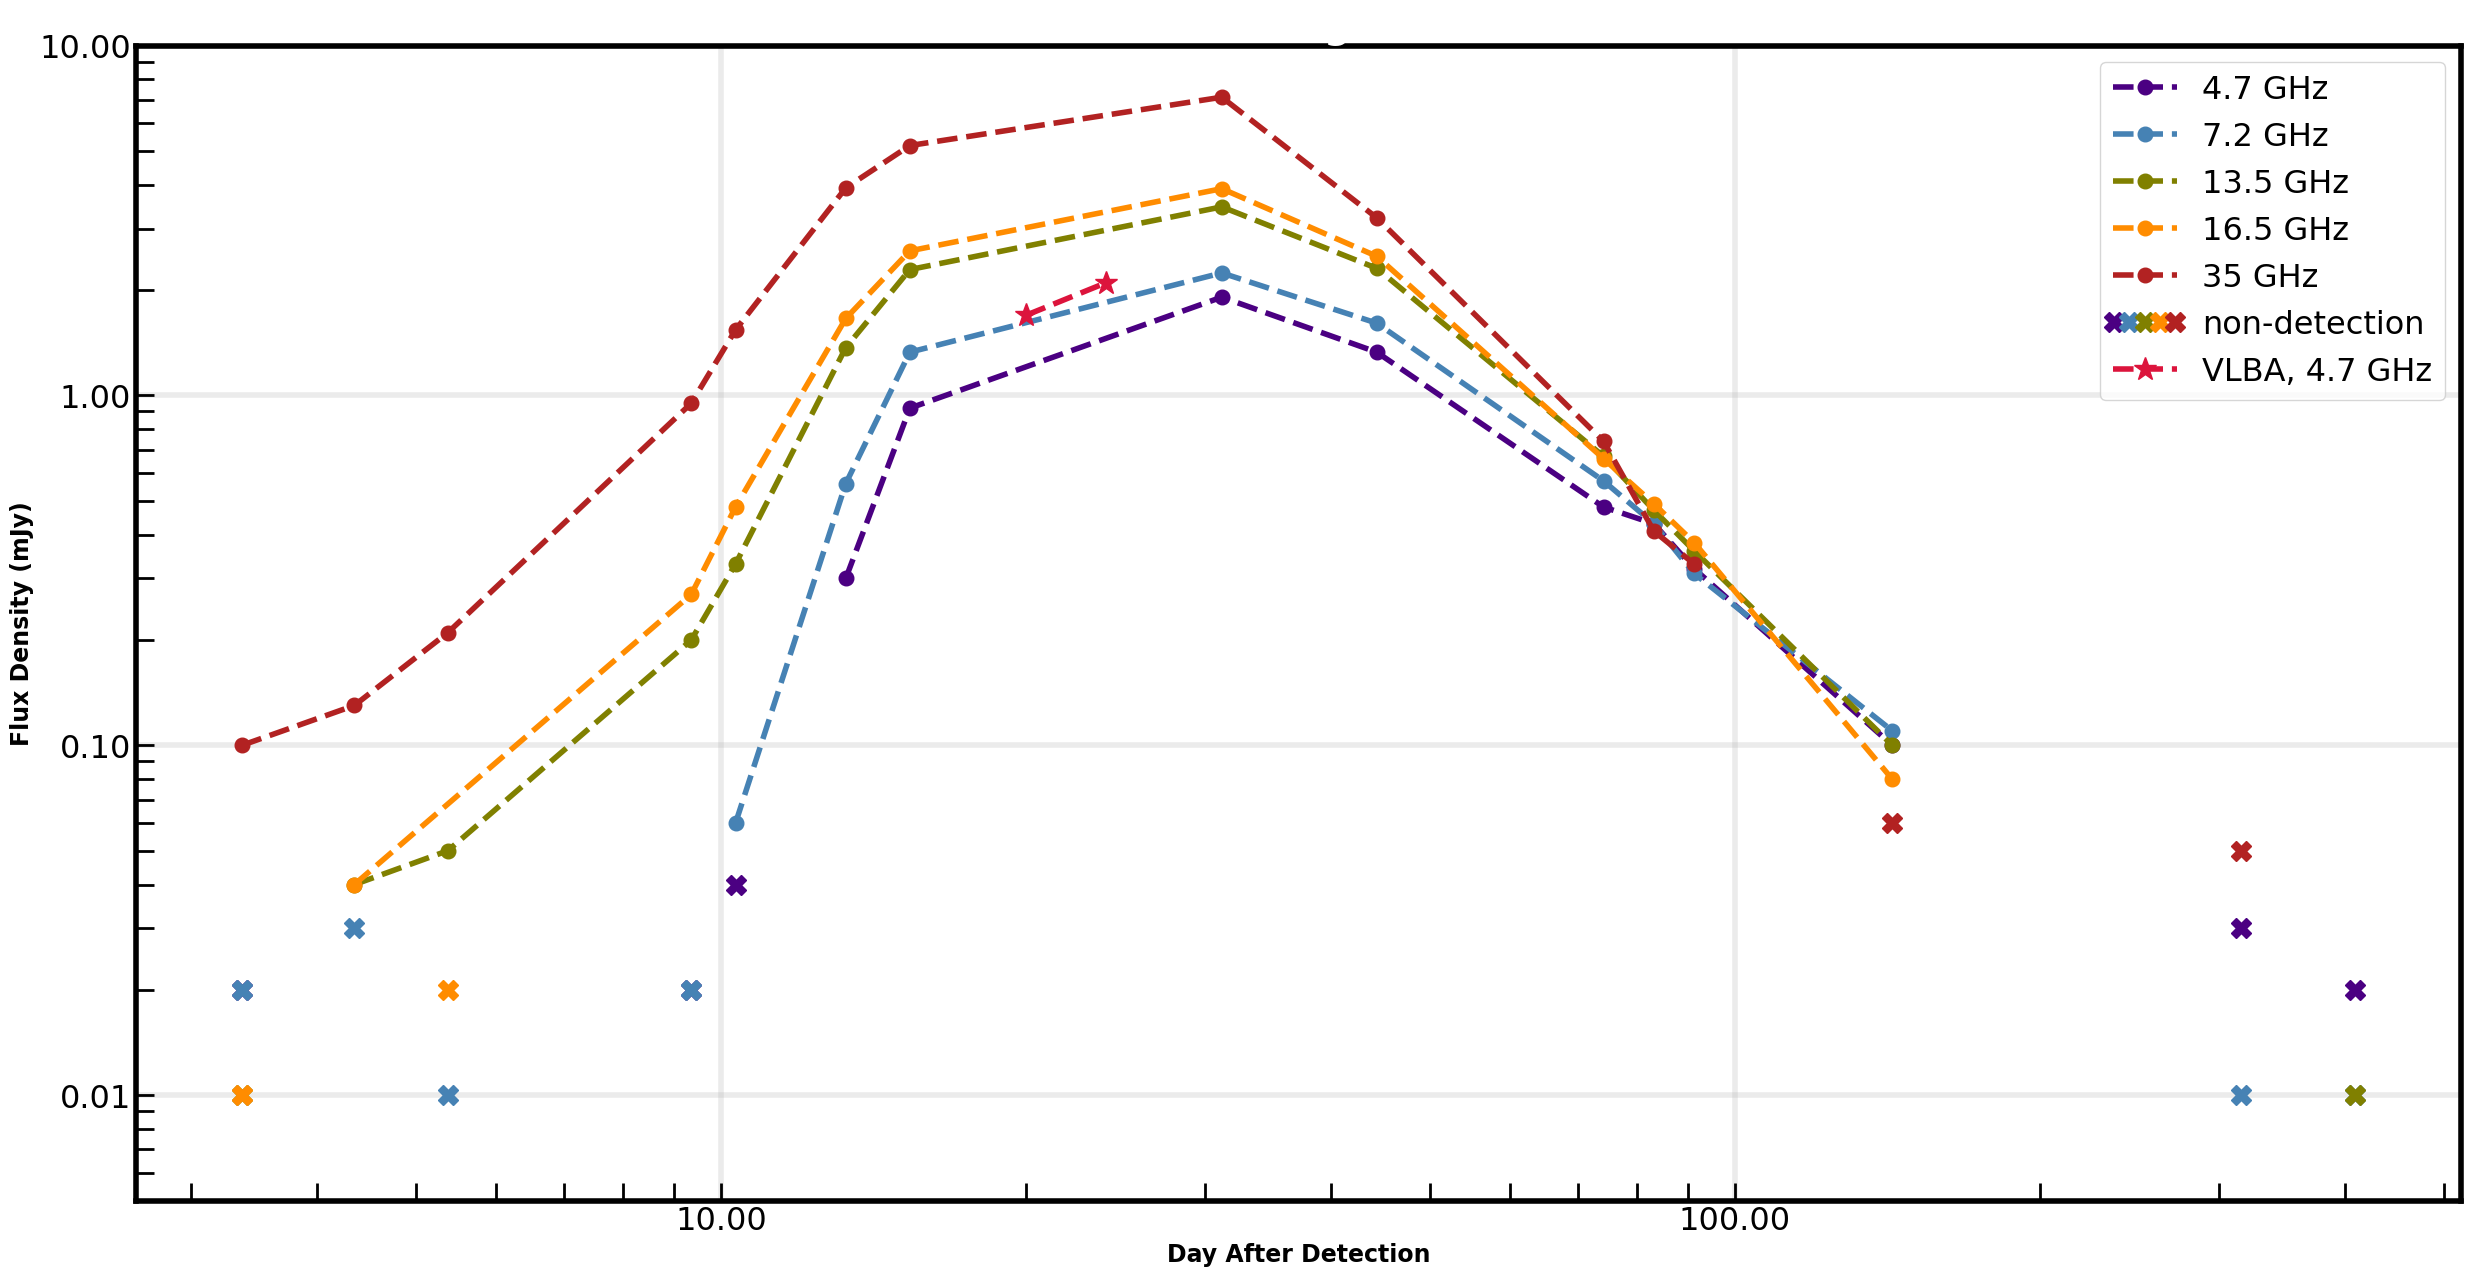

In [12]:
# 5#plt.style.use('seaborn-v0_8');
fig, ax = plt.subplots(figsize=(30,15), facecolor='white');
ax.set_facecolor('white');
# plt.rcParams.update({'font.size': 19});
# plt.rcParams.update({'axes.labelsize': 9});
# plt.rcParams.update({'axes.linewidth': 2});
# plt.rcParams.update({'lines.linewidth': 3});
# plt.rcParams.update({'lines.markersize': 15});
# plt.rcParams.update({'grid.linewidth': 2});
# plt.rcParams.update({'xtick.direction': 'in'});
# plt.rcParams.update({'ytick.direction': 'in'});

plt.rcParams.update({'font.size': 23});
plt.rcParams.update({'axes.labelsize': 13});
plt.rcParams.update({'axes.linewidth': 4});
plt.rcParams.update({'lines.linewidth': 4});
plt.rcParams.update({'lines.markersize': 21});
plt.rcParams.update({'grid.linewidth': 4});
plt.rcParams.update({'xtick.direction': 'in'});
plt.rcParams.update({'ytick.direction': 'in'});
plt.rcParams.update({'text.color': 'black'});



line_c, = ax.plot(lc_c_d['Day'], lc_c_d['Flux'], linestyle='dashed' , marker='.', color='indigo');
line_x, = ax.plot(lc_x_d['Day'], lc_x_d['Flux'], linestyle='dashed',  marker='.' , color='steelblue');
line_ku, = ax.plot(lc_ku_d['Day'], lc_ku_d['Flux'],linestyle='dashed', marker='.' , color='olive');
line_k, = ax.plot(lc_k_d['Day'], lc_k_d['Flux'], linestyle='dashed', marker='.' , color='darkorange');
line_q, = ax.plot(lc_q_d['Day'], lc_q_d['Flux'], linestyle='dashed', marker='.' , color='firebrick');


#ax.plot(lc_ka_d['Day'], lc_ka_d['Flux'], linestyle='dashed', linewidth=0.75,marker='.', color='firebrick', label='31 GHz');
#non-detections
line_c_nd, = ax.plot(lc_c_nd['Day'], lc_c_nd['Flux'], marker='X', linestyle='none',  markersize=15, color='indigo');
line_x_nd, = ax.plot(lc_x_nd['Day'], lc_x_nd['Flux'], marker='X', linestyle='none', markersize=15, color='steelblue');
line_ku_nd, = ax.plot(lc_ku_nd['Day'], lc_ku_nd['Flux'], marker='X',linestyle='none',  markersize=15, color='olive');
line_k_nd, = ax.plot(lc_k_nd['Day'], lc_k_nd['Flux'], marker='X', linestyle='none', markersize=15, color='darkorange');
#ax.scatter(lc_ka_nd['Day'], lc_ka_nd['Flux'], marker='+', color='firebrick');
line_q_nd, = ax.plot(lc_q_nd['Day'], lc_q_nd['Flux'], marker='X', markersize=15, linestyle='none', color='firebrick');

#VLBA
line_VLBA, = ax.plot(VLBA['Day'], VLBA['Flux'], linestyle='dashed', marker='*', markersize=17, color='crimson');

ax.set_xscale('log');
ax.set_yscale('log');
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'));
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'));
ax.tick_params(which='both', direction='in', length=13, width=2);
ax.legend([line_c, line_x, line_ku, line_k, line_q, (line_c_nd, line_x_nd, line_ku_nd, line_k_nd, line_q_nd), line_VLBA],
          ['4.7 GHz', '7.2 GHz', '13.5 GHz', '16.5 GHz', '35 GHz', 'non-detection', 'VLBA, 4.7 GHz'], handler_map={tuple: HandlerTuple(ndivide=None)});

ax.grid(True, alpha=0.25);

#ax.set_xlim(7,1000);
ax.set_ylim(0.005, 10);
ax.set_title('Cute Radio Light Curves', fontsize=27, weight='bold');
ax.set_ylabel('Flux Density (mJy)', fontsize=17, weight='bold');
ax.set_xlabel('Day After Detection', fontsize=17, weight='bold');

### Distance

In [ ]:
V1674HERB = SkyCoord('18 57 30.9774433', '16 53 39.488407', unit=(un.hourangle, un.degree), frame='fk5' );
V1674HERD = SkyCoord('18 57 30.9776461', '16 53 39.491168', unit=(un.hourangle, un.degree), frame='fk5' );
aips_fit_coord = SkyCoord('18 57 30.9776461', '16 53 39.491168', unit=(un.hourangle, un.degree), frame='fk5');
sep = V1674HERB.separation(V1674HERD).mas
print(sep)

4.011904990408775


In [ ]:
d = 6.3e3
theta = 0.0080879
D = np.tan(sep)*d
pc_au = 2.0626481e5
D_au = D*pc_au

In [ ]:
f'{D_au:.3E}'

'2.528E+01'

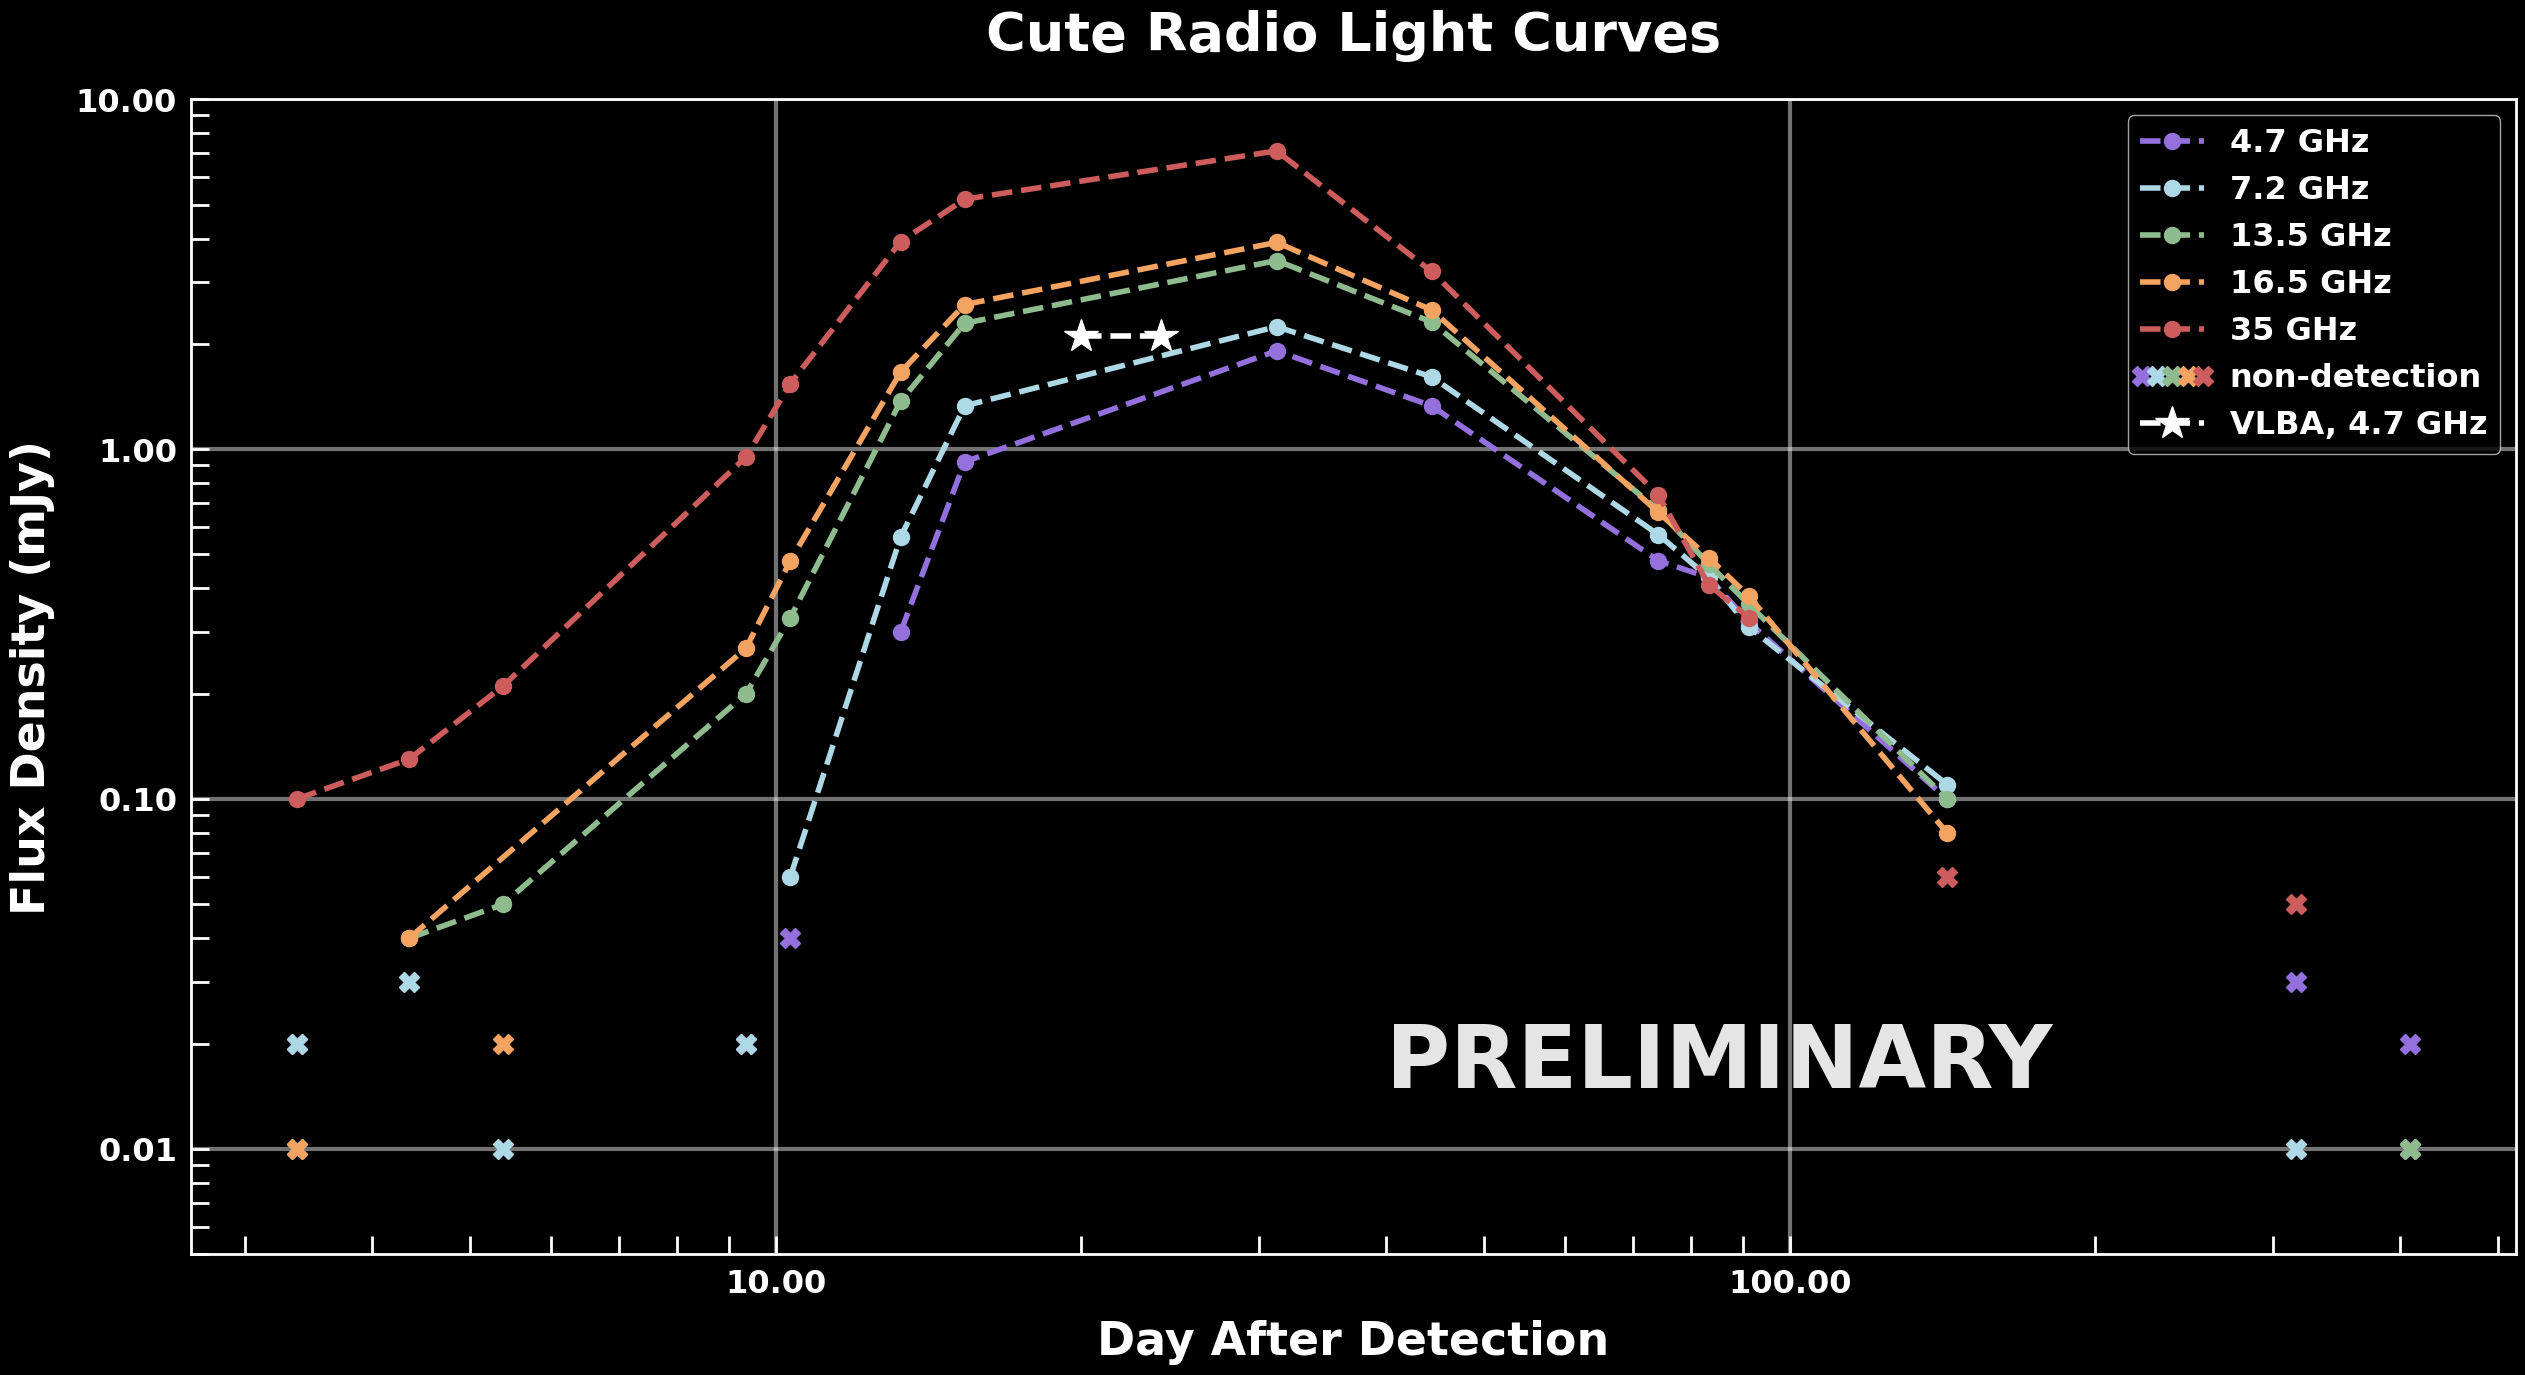

In [ ]:
# 5#plt.style.use('seaborn-v0_8');
fig, ax = plt.subplots(figsize=(30,15), facecolor='black');
ax.set_facecolor('black');
# plt.rcParams.update({'font.size': 19});
# plt.rcParams.update({'axes.labelsize': 9});
# plt.rcParams.update({'axes.linewidth': 2});
# plt.rcParams.update({'lines.linewidth': 3});
# plt.rcParams.update({'lines.markersize': 15});
# plt.rcParams.update({'grid.linewidth': 2});
# plt.rcParams.update({'xtick.direction': 'in'});
# plt.rcParams.update({'ytick.direction': 'in'});

plt.rcParams.update({'font.size': 23});
plt.rcParams.update({'axes.labelsize': 13});
plt.rcParams.update({'axes.linewidth': 4});
plt.rcParams.update({'lines.linewidth': 4});
plt.rcParams.update({'lines.markersize': 23});
plt.rcParams.update({'grid.linewidth': 4});
plt.rcParams.update({'xtick.direction': 'in'});
plt.rcParams.update({'ytick.direction': 'in'});
plt.rcParams.update({'text.color': 'white'});
plt.rcParams.update({'axes.labelcolor': 'white'});
plt.rcParams.update({'xtick.labelcolor': 'white'});
plt.rcParams.update({'axes.labelsize': 'large'});
plt.rcParams.update({'ytick.labelcolor': 'white'});
plt.rcParams.update({'font.weight': 'bold'});

line_c, = ax.plot(lc_c_d['Day'], lc_c_d['Flux'], linestyle='dashed' , marker='.', color='mediumpurple');
line_x, = ax.plot(lc_x_d['Day'], lc_x_d['Flux'], linestyle='dashed',  marker='.' , color='lightblue');
line_ku, = ax.plot(lc_ku_d['Day'], lc_ku_d['Flux'],linestyle='dashed', marker='.' , color='darkseagreen');
line_k, = ax.plot(lc_k_d['Day'], lc_k_d['Flux'], linestyle='dashed', marker='.' , color='sandybrown');
line_q, = ax.plot(lc_q_d['Day'], lc_q_d['Flux'], linestyle='dashed', marker='.' , color='indianred');


#ax.plot(lc_ka_d['Day'], lc_ka_d['Flux'], linestyle='dashed', linewidth=0.75,marker='.', color='firebrick', label='31 GHz');
#non-detections
line_c_nd, = ax.plot(lc_c_nd['Day'], lc_c_nd['Flux'], marker='X', linestyle='none',  markersize=15, color='mediumpurple');
line_x_nd, = ax.plot(lc_x_nd['Day'], lc_x_nd['Flux'], marker='X', linestyle='none', markersize=15, color='lightblue');
line_ku_nd, = ax.plot(lc_ku_nd['Day'], lc_ku_nd['Flux'], marker='X',linestyle='none',  markersize=15, color='darkseagreen');
line_k_nd, = ax.plot(lc_k_nd['Day'], lc_k_nd['Flux'], marker='X', linestyle='none', markersize=15, color='sandybrown');
#ax.scatter(lc_ka_nd['Day'], lc_ka_nd['Flux'], marker='+', color='firebrick');
line_q_nd, = ax.plot(lc_q_nd['Day'], lc_q_nd['Flux'], marker='X', markersize=15, linestyle='none', color='indianred');

#VLBA
line_VLBA, = ax.plot(VLBA['Day'], VLBA['Flux'], linestyle='dashed', marker='*', markersize=25, color='white');

ax.set_xscale('log');
ax.set_yscale('log');
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'));
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'));
ax.tick_params(which='both', direction='in', length=13, width=2, color='white', pad=10.0);
ax.legend([line_c, line_x, line_ku, line_k, line_q, (line_c_nd, line_x_nd, line_ku_nd, line_k_nd, line_q_nd), line_VLBA],
          ['4.7 GHz', '7.2 GHz', '13.5 GHz', '16.5 GHz', '35 GHz', 'non-detection', 'VLBA, 4.7 GHz'],facecolor='black', handler_map={tuple: HandlerTuple(ndivide=None)});

ax.grid(True, color='white', alpha=0.45, linewidth=3);
for spine in ax.spines.values():
    spine.set_edgecolor('white');
    spine.set_linewidth(2);
#ax.set_xlim(7,1000);
plt.text(40, 0.015, 'PRELIMINARY', fontsize=63, alpha=0.9);
ax.set_ylim(0.005, 10);
ax.set_title('Cute Radio Light Curves', fontsize=39, weight='bold', pad=35);
ax.set_ylabel('Flux Density (mJy)', fontsize=33, color='white', weight='bold', labelpad=15);
ax.set_xlabel('Day After Detection', fontsize=33, color='white', weight='bold', labelpad=15);